# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 18 vs Chr 18p11

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 0

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_18': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-4L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-5L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\ch

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_18']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-8L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-11L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-13L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-16L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\183873-del(18)(p11)-7L.bmp',
 '

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_18': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-1L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-2L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-i(18)(q10)+18-3L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_18\\181228-

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_18', 'chr_18_p11_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  0
chr_18
   Train: 
        181228-i(18)(q10)+18-10L.bmp
        181228-i(18)(q10)+18-11L.bmp
        181228-i(18)(q10)+18-12L.bmp
        181228-i(18)(q10)+18-13L.bmp
        181228-i(18)(q10)+18-2L.bmp
        181228-i(18)(q10)+18-3L.bmp
        181228-i(18)(q10)+18-4L.bmp
        181228-i(18)(q10)+18-5L.bmp
        181228-i(18)(q10)+18-7L.bmp
        181228-i(18)(q10)+18-9L.bmp
        183873-del(18)(p11)-10L.bmp
        183873-del(18)(p11)-12L.bmp
        183873-del(18)(p11)-14L.bmp
        183873-del(18)(p11)-15L.bmp
        183873-del(18)(p11)-17L.bmp
        183873-del(18)(p11)-18L.bmp
        183873-del(18)(p11)-19L.bmp
        183873-del(18)(p11)-1L.bmp
        183873-del(18)(p11)-20L.bmp
        183873-del(18)(p11)-21L.bmp
        183873-del(18)(p11)-22L.bmp
        183873-del(18)(p11)-23L.bmp
        183873-del(18)(p11)-24L.bmp
        183873-del(18)(p11)-2L.bmp
        183873-del(18)(p11)-4L.bmp
        183873-del(18)(p11)-5L.bmp
        183873-del(18)(p11)-6

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

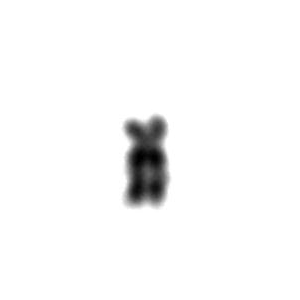

In [12]:
image['chr_18'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_p11_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_p11_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [24]:
len(X_train)

200

In [25]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [26]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [29]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(32, activation='softmax'))

### 3.2.4. Tensorboard Initilization

In [30]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=300, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/300
4/4 [==============================] - 5s 691ms/step - loss: 1066.3480 - accuracy: 0.2900 - val_loss: 17.3483 - val_accuracy: 0.7059
Epoch 2/300
4/4 [==============================] - 0s 122ms/step - loss: 43.7213 - accuracy: 0.4500 - val_loss: 7.8622 - val_accuracy: 0.7059
Epoch 3/300
4/4 [==============================] - 0s 114ms/step - loss: 4.5062 - accuracy: 0.5800 - val_loss: 3.2295 - val_accuracy: 0.7059
Epoch 4/300
4/4 [==============================] - 0s 111ms/step - loss: 2.4527 - accuracy: 0.7000 - val_loss: 0.5842 - val_accuracy: 0.7059
Epoch 5/300
4/4 [==============================] - 0s 103ms/step - loss: 5.7662 - accuracy: 0.5600 - val_loss: 0.6629 - val_accuracy: 0.7059
Epoch 6/300
4/4 [==============================] - 0s 111ms/step - loss: 0.8000 - accuracy: 0.7000 - val_loss: 0.6225 - val_accuracy: 0.7059
Epoch 7/300
4/4 [==============================] - 0s 111ms/step - loss: 0.5484 - accuracy: 0.7100 - val_loss: 0.4254 - val_accuracy: 0.8627
Epoch 8/

Epoch 59/300
4/4 [==============================] - 0s 113ms/step - loss: 0.0100 - accuracy: 0.9950 - val_loss: 5.6005 - val_accuracy: 0.5686
Epoch 60/300
4/4 [==============================] - 0s 114ms/step - loss: 0.0293 - accuracy: 0.9900 - val_loss: 5.4728 - val_accuracy: 0.5882
Epoch 61/300
4/4 [==============================] - 0s 113ms/step - loss: 0.0132 - accuracy: 0.9950 - val_loss: 5.3583 - val_accuracy: 0.6078
Epoch 62/300
4/4 [==============================] - 0s 120ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 5.2379 - val_accuracy: 0.6471
Epoch 63/300
4/4 [==============================] - 0s 115ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 5.1913 - val_accuracy: 0.6471
Epoch 64/300
4/4 [==============================] - 0s 106ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 5.2200 - val_accuracy: 0.6471
Epoch 65/300
4/4 [==============================] - 0s 117ms/step - loss: 0.0141 - accuracy: 0.9950 - val_loss: 5.3394 - val_accuracy: 0.6471
Epoch 

Epoch 116/300
4/4 [==============================] - 0s 121ms/step - loss: 2.7424e-05 - accuracy: 1.0000 - val_loss: 6.8777 - val_accuracy: 0.7647
Epoch 117/300
4/4 [==============================] - 0s 110ms/step - loss: 2.6284e-05 - accuracy: 1.0000 - val_loss: 6.9140 - val_accuracy: 0.7647
Epoch 118/300
4/4 [==============================] - 0s 110ms/step - loss: 2.4907e-05 - accuracy: 1.0000 - val_loss: 6.9457 - val_accuracy: 0.7647
Epoch 119/300
4/4 [==============================] - 0s 118ms/step - loss: 2.3746e-05 - accuracy: 1.0000 - val_loss: 6.9762 - val_accuracy: 0.7647
Epoch 120/300
4/4 [==============================] - 0s 110ms/step - loss: 2.2594e-05 - accuracy: 1.0000 - val_loss: 7.0102 - val_accuracy: 0.7647
Epoch 121/300
4/4 [==============================] - 0s 110ms/step - loss: 2.1480e-05 - accuracy: 1.0000 - val_loss: 7.0460 - val_accuracy: 0.7647
Epoch 122/300
4/4 [==============================] - 0s 110ms/step - loss: 2.0312e-05 - accuracy: 1.0000 - val_loss: 7

Epoch 172/300
4/4 [==============================] - 0s 109ms/step - loss: 2.4447e-06 - accuracy: 1.0000 - val_loss: 8.5910 - val_accuracy: 0.7647
Epoch 173/300
4/4 [==============================] - 0s 110ms/step - loss: 2.3905e-06 - accuracy: 1.0000 - val_loss: 8.6045 - val_accuracy: 0.7647
Epoch 174/300
4/4 [==============================] - 0s 110ms/step - loss: 2.3535e-06 - accuracy: 1.0000 - val_loss: 8.6178 - val_accuracy: 0.7647
Epoch 175/300
4/4 [==============================] - 0s 115ms/step - loss: 2.3058e-06 - accuracy: 1.0000 - val_loss: 8.6307 - val_accuracy: 0.7647
Epoch 176/300
4/4 [==============================] - 0s 122ms/step - loss: 2.2725e-06 - accuracy: 1.0000 - val_loss: 8.6447 - val_accuracy: 0.7647
Epoch 177/300
4/4 [==============================] - 1s 323ms/step - loss: 2.2361e-06 - accuracy: 1.0000 - val_loss: 8.6589 - val_accuracy: 0.7647
Epoch 178/300
4/4 [==============================] - 0s 112ms/step - loss: 2.1920e-06 - accuracy: 1.0000 - val_loss: 8

Epoch 228/300
4/4 [==============================] - 0s 110ms/step - loss: 8.8210e-07 - accuracy: 1.0000 - val_loss: 9.3418 - val_accuracy: 0.7451
Epoch 229/300
4/4 [==============================] - 0s 111ms/step - loss: 8.6601e-07 - accuracy: 1.0000 - val_loss: 9.3511 - val_accuracy: 0.7451
Epoch 230/300
4/4 [==============================] - 0s 111ms/step - loss: 8.5767e-07 - accuracy: 1.0000 - val_loss: 9.3597 - val_accuracy: 0.7451
Epoch 231/300
4/4 [==============================] - 0s 107ms/step - loss: 8.5052e-07 - accuracy: 1.0000 - val_loss: 9.3685 - val_accuracy: 0.7451
Epoch 232/300
4/4 [==============================] - 0s 114ms/step - loss: 8.3621e-07 - accuracy: 1.0000 - val_loss: 9.3767 - val_accuracy: 0.7451
Epoch 233/300
4/4 [==============================] - 0s 113ms/step - loss: 8.2608e-07 - accuracy: 1.0000 - val_loss: 9.3856 - val_accuracy: 0.7451
Epoch 234/300
4/4 [==============================] - 0s 107ms/step - loss: 8.1714e-07 - accuracy: 1.0000 - val_loss: 9

Epoch 284/300
4/4 [==============================] - 0s 111ms/step - loss: 4.0053e-07 - accuracy: 1.0000 - val_loss: 9.8945 - val_accuracy: 0.7451
Epoch 285/300
4/4 [==============================] - 0s 112ms/step - loss: 3.9696e-07 - accuracy: 1.0000 - val_loss: 9.9035 - val_accuracy: 0.7451
Epoch 286/300
4/4 [==============================] - 0s 112ms/step - loss: 3.9219e-07 - accuracy: 1.0000 - val_loss: 9.9114 - val_accuracy: 0.7451
Epoch 287/300
4/4 [==============================] - 0s 119ms/step - loss: 3.8563e-07 - accuracy: 1.0000 - val_loss: 9.9182 - val_accuracy: 0.7451
Epoch 288/300
4/4 [==============================] - 0s 113ms/step - loss: 3.8325e-07 - accuracy: 1.0000 - val_loss: 9.9257 - val_accuracy: 0.7451
Epoch 289/300
4/4 [==============================] - 0s 115ms/step - loss: 3.7908e-07 - accuracy: 1.0000 - val_loss: 9.9328 - val_accuracy: 0.7451
Epoch 290/300
4/4 [==============================] - 0s 122ms/step - loss: 3.7550e-07 - accuracy: 1.0000 - val_loss: 9

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 15036), started 14 days, 0:34:11 ago. (Use '!kill 15036' to kill it.)

## 3.8 Save the Model

In [35]:
model.save('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_18_cnn_iteration_0\assets


## 3.9 Load the Model

In [36]:
model_reload = keras.models.load_model('saved_model/model_Chr_18_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.1. Accuracy

In [37]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.745


In [38]:
len(X_test)

51

In [39]:
y_predict = model_reload.predict(X_test)

In [40]:
len(y_predict)

51

In [41]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [42]:
len(y_predict_filtered)

51

In [43]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [44]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [45]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [46]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [47]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    a = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    b = np.load(f2)

In [48]:
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [49]:
b

array([[1.0000000e+00, 7.5298384e-18, 2.6127614e-29, ..., 1.0702412e-27,
        1.2026740e-30, 5.7584618e-32],
       [9.9999976e-01, 2.4364152e-07, 1.7705989e-18, ..., 4.5188997e-18,
        4.8281922e-19, 7.6774300e-21],
       [8.3952504e-01, 1.6047497e-01, 4.2048687e-19, ..., 1.3127247e-18,
        3.3484770e-19, 3.7388854e-21],
       ...,
       [8.3129454e-01, 1.6870551e-01, 6.1586020e-22, ..., 4.1811649e-21,
        2.8538079e-22, 6.8758110e-24],
       [1.0000000e+00, 1.0552665e-18, 4.6218770e-28, ..., 1.5907124e-26,
        2.6649646e-29, 2.2387801e-30],
       [2.2241950e-06, 9.9999774e-01, 3.2164268e-16, ..., 3.9861619e-16,
        6.3165375e-16, 2.8179866e-17]], dtype=float32)

### 3.10.2. Classification Report

In [50]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.79      0.86      0.83        36
chr_18_p11_deletion       0.58      0.47      0.52        15

          micro avg       0.75      0.75      0.75        51
          macro avg       0.69      0.66      0.67        51
       weighted avg       0.73      0.75      0.74        51



### 3.10.3. Confusion Matrix

In [51]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_18_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_p11_deletion
chr_18,31,5
chr_18_p11_deletion,8,7


#### Heat Map

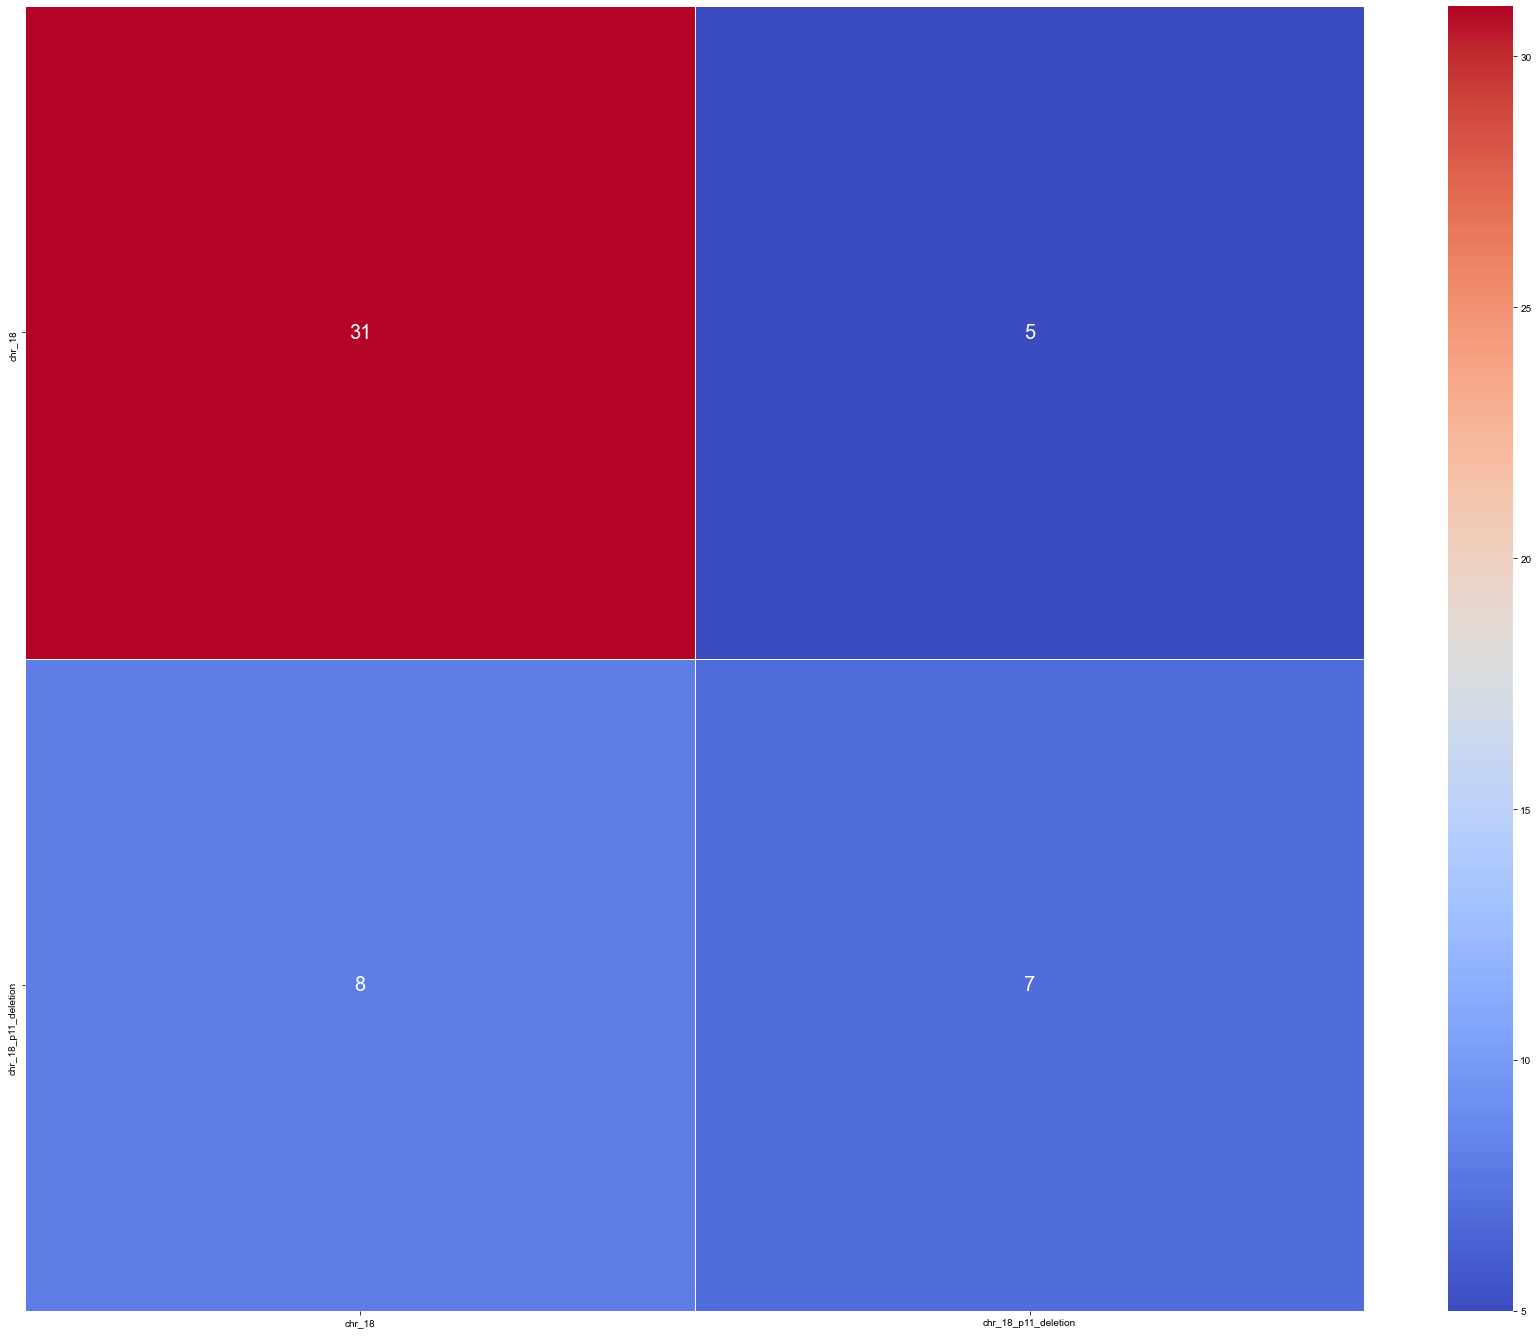

In [52]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [53]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_18_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [54]:
y_predict

array([[1.0000000e+00, 7.5298384e-18, 2.6127614e-29, ..., 1.0702412e-27,
        1.2026740e-30, 5.7584618e-32],
       [9.9999976e-01, 2.4364152e-07, 1.7705989e-18, ..., 4.5188997e-18,
        4.8281922e-19, 7.6774300e-21],
       [8.3952504e-01, 1.6047497e-01, 4.2048687e-19, ..., 1.3127247e-18,
        3.3484770e-19, 3.7388854e-21],
       ...,
       [8.3129454e-01, 1.6870551e-01, 6.1586020e-22, ..., 4.1811649e-21,
        2.8538079e-22, 6.8758110e-24],
       [1.0000000e+00, 1.0552665e-18, 4.6218770e-28, ..., 1.5907124e-26,
        2.6649646e-29, 2.2387801e-30],
       [2.2241950e-06, 9.9999774e-01, 3.2164268e-16, ..., 3.9861619e-16,
        6.3165375e-16, 2.8179866e-17]], dtype=float32)

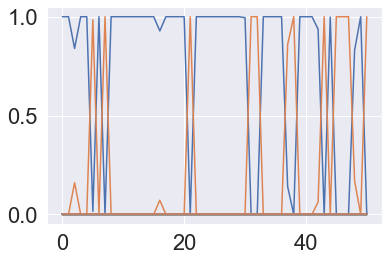

In [55]:
plt.plot(y_predict)

In [56]:
y_predict_1D = y_predict[:,0]

In [57]:
y_predict_1D_processed = 1- y_predict_1D

In [58]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [59]:
auc_rf

0.7388888888888889

In [60]:
x = y = np.arange(0,1.1,0.1)

In [61]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

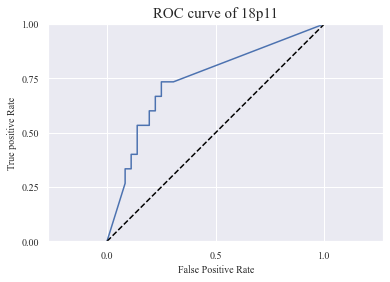

In [62]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of 18p11', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [63]:
auc_value = auc(fpr, tpr)

In [64]:
print('AUC is ', auc_value)

AUC is  0.7388888888888889


# Results

In [65]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.745


In [66]:
print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.79      0.86      0.83        36
chr_18_p11_deletion       0.58      0.47      0.52        15

          micro avg       0.75      0.75      0.75        51
          macro avg       0.69      0.66      0.67        51
       weighted avg       0.73      0.75      0.74        51



In [67]:
type(performanceReport)

str

In [68]:
confusion

,chr_18,chr_18_p11_deletion
chr_18,31,5
chr_18_p11_deletion,8,7


In [69]:
print('AUC is ', auc_value)

AUC is  0.7388888888888889


## Export to a text file

In [70]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()